<a href="https://colab.research.google.com/github/fernandiwp/ProjectAkhirML/blob/main/Project_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok:**
*   David - 2301868491
*   Fernandi Widardo - 2301864000
*   Gabriel Fortino Bodhi - 2301862342

**Dataset:**

Stroke Prediction Dataset

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [30]:
#Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [31]:
#Importing dataset

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [32]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [33]:
#Data Cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [34]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [35]:
#Dari hasil diatas kita dapat mengetahui bahwa pada kolom bmi terdapat 201 row yang memiliki nilai null
#Maka dari itu kami akan menghilangkan row dengan nilai null tersebut

df.dropna(inplace=True)
# df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [36]:
#Kita lakukan cek kembali apakah masih ada nilai null

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [37]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Setelah melakukan pembersihan total row data berkurang sebanyak 201 row
Sehingga total row dataset yang ada menjadi sebanyak 4909

In [38]:
#Kemudian menghapus kolom yang tidak diperlukan
#Yaitu kolom id

df.drop('id', axis=1, inplace=True)

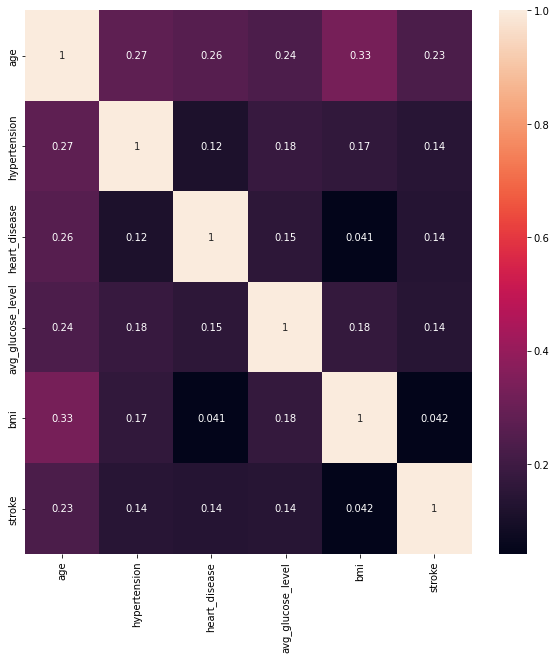

In [39]:
#Mengecek korelasi antar variabel pada dataset

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

Data Preprocessing

Pada data preprocessing ini kami akan menggunakan Label Encoding dan One-Hot Encoding

In [40]:
#Label Encoding
#Label Encoding merupakan salah satu teknik encoding untuk mengatasi variabel yang bersifat kategori

df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [41]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [42]:
residenceMapping = {'Urban': 0, 'Rural': 1}
df['Residence_type'] = df['Residence_type'].map(residenceMapping)

In [43]:
marriageMapping = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(marriageMapping)

In [44]:
#Mengecek apakah data row pada di kolom Residence_type dan ever_married sudah berubah

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,0,186.21,29.0,formerly smoked,1


One-Hot Encoding merupakan representasi binary dari setiap variabel kategori. Karena banyak algoritma machine learning tidak dapat bekerja langsung dengan variabel kategori. Maka kita harus merubah kategori menjadi angka

In [45]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [46]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [47]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [48]:
df['gender'] = pd.Categorical(df['gender'])
dfDummies_gender = pd.get_dummies(df['gender'], prefix='gender_encoded')
dfDummies_gender

,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other
0,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
...,...,...,...
5104,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [49]:
df['smoking_status'] = pd.Categorical(df['smoking_status'])
dfDummies_smoking_status = pd.get_dummies(df['smoking_status'], prefix='smoking_status_encoded')
dfDummies_smoking_status

,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
5,0,1,0,0
...,...,...,...,...
5104,1,0,0,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [50]:
df['work_type'] = pd.Categorical(df['work_type'])
dfDummies_work_type = pd.get_dummies(df['work_type'], prefix='work_type_encoded')
dfDummies_work_type

,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children
0,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
5,0,0,1,0,0
...,...,...,...,...,...
5104,0,0,0,0,1
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [51]:
#Mengganti kolom kategori pada dataset dengan yang sudah dirubah menjadi angka

df.drop("gender", axis=1, inplace=True)
df.drop("smoking_status", axis=1, inplace=True)
df.drop("work_type", axis=1, inplace=True)

In [52]:
df = pd.concat([df, dfDummies_gender], axis=1)
df = pd.concat([df, dfDummies_smoking_status], axis=1)
df = pd.concat([df, dfDummies_work_type], axis=1)

In [53]:
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children
0,67.0,0,1,1,0,228.69,36.6,1,0,1,0,0,1,0,0,0,0,1,0,0
2,80.0,0,1,1,1,105.92,32.5,1,0,1,0,0,0,1,0,0,0,1,0,0
3,49.0,0,0,1,0,171.23,34.4,1,1,0,0,0,0,0,1,0,0,1,0,0
4,79.0,1,0,1,1,174.12,24.0,1,1,0,0,0,0,1,0,0,0,0,1,0
5,81.0,0,0,1,0,186.21,29.0,1,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,0,1,103.08,18.6,0,1,0,0,1,0,0,0,0,0,0,0,1
5106,81.0,0,0,1,0,125.20,40.0,0,1,0,0,0,0,1,0,0,0,0,1,0
5107,35.0,0,0,1,1,82.99,30.6,0,1,0,0,0,0,1,0,0,0,0,1,0
5108,51.0,0,0,1,1,166.29,25.6,0,0,1,0,0,1,0,0,0,0,1,0,0


In [54]:
#Standarization
#Kita perlu melakukan Standarization karena beberapa variable
#Memiliki satuan/units yang berbeda

std = StandardScaler()
targetColumns = ['avg_glucose_level', 'bmi', 'age']
scaledColumns = std.fit_transform(df[['avg_glucose_level', 'bmi', 'age']])
scaledColumns = pd.DataFrame(scaledColumns, columns=targetColumns)

In [55]:
df = df.merge(scaledColumns, left_index=True, right_index=True, how="left")
df

,age_x,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level_x,bmi_x,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,avg_glucose_level_y,bmi_y,age_y
0,67.0,0,1,1,0,228.69,36.6,1,0,1,0,0,1,0,0,0,0,1,0,0,2.777698,0.981345,1.070138
2,80.0,0,1,1,1,105.92,32.5,1,0,1,0,0,0,1,0,0,0,1,0,0,1.484132,0.701207,0.272012
3,49.0,0,0,1,0,171.23,34.4,1,1,0,0,0,0,0,1,0,0,1,0,0,1.549193,-0.623083,1.602222
4,79.0,1,0,1,1,174.12,24.0,1,1,0,0,0,0,1,0,0,0,0,1,0,1.821368,0.013595,1.690903
5,81.0,0,0,1,0,186.21,29.0,1,0,1,0,0,1,0,0,0,0,1,0,0,-0.792780,-0.190142,1.380520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,0,1,103.08,18.6,0,1,0,0,1,0,0,0,0,0,0,0,1,NaN,NaN,NaN
5106,81.0,0,0,1,0,125.20,40.0,0,1,0,0,0,0,1,0,0,0,0,1,0,NaN,NaN,NaN
5107,35.0,0,0,1,1,82.99,30.6,0,1,0,0,0,0,1,0,0,0,0,1,0,NaN,NaN,NaN
5108,51.0,0,0,1,1,166.29,25.6,0,0,1,0,0,1,0,0,0,0,1,0,0,NaN,NaN,NaN


In [56]:
#Karena ada value null lagi
#Maka harus dibersihkan kembali

df.dropna(inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4717 entries, 0 to 4908
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age_x                                   4717 non-null   float64
 1   hypertension                            4717 non-null   int64  
 2   heart_disease                           4717 non-null   int64  
 3   ever_married                            4717 non-null   int64  
 4   Residence_type                          4717 non-null   int64  
 5   avg_glucose_level_x                     4717 non-null   float64
 6   bmi_x                                   4717 non-null   float64
 7   stroke                                  4717 non-null   int64  
 8   gender_encoded_Female                   4717 non-null   uint8  
 9   gender_encoded_Male                     4717 non-null   uint8  
 10  gender_encoded_Other                    4717 non-null   uint

In [58]:
#Data Splitting

y = df["stroke"]
X = df.drop(['stroke'], axis=1)

In [59]:
#Membagi dataset menjadi Train Set sebesar 70% dan Test Set sebesar 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
X_train

,age_x,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level_x,bmi_x,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,avg_glucose_level_y,bmi_y,age_y
968,55.0,0,0,1,1,112.47,32.8,1,0,0,0,0,0,1,0,0,1,0,0,0.096463,-0.342945,0.538054
148,57.0,1,0,1,1,67.41,32.9,1,0,0,0,0,1,0,1,0,0,0,0,0.129106,0.395601,0.715415
1696,50.0,0,0,1,0,104.24,32.8,1,0,0,1,0,0,0,1,0,0,0,0,-0.748431,0.166397,-0.836497
1328,40.0,0,0,1,0,103.09,35.6,1,0,0,1,0,0,0,0,0,1,0,0,-0.395885,-0.241076,0.538054
4412,38.0,0,0,1,0,151.26,20.6,1,0,0,0,0,1,0,0,0,1,0,0,-0.388681,0.179131,-0.437434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,19.0,0,0,0,0,89.30,22.1,1,0,0,0,0,1,0,0,0,1,0,0,-0.230193,0.663006,-0.260073
511,51.0,0,0,1,1,82.93,29.7,1,0,0,0,0,0,1,0,0,1,0,0,-0.037937,1.528888,0.138990
3247,53.0,0,0,1,1,90.65,22.1,1,0,0,0,1,0,0,0,0,1,0,0,-0.193723,0.319200,-0.304413
3946,11.0,0,0,0,1,93.51,20.8,1,0,0,1,0,0,0,0,0,0,0,1,2.531187,-0.432080,1.114478


In [61]:
y_train

968     0
148     1
1696    0
1328    0
4412    0
       ..
4613    0
511     0
3247    0
3946    0
916     0
Name: stroke, Length: 3301, dtype: int64

In [62]:
X_test

,age_x,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level_x,bmi_x,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,avg_glucose_level_y,bmi_y,age_y
1276,62.0,0,0,1,0,88.63,24.5,1,0,0,0,0,1,0,1,0,0,0,0,-0.427178,0.535670,0.981457
2138,72.0,0,0,1,0,92.59,24.6,0,1,0,0,1,0,0,0,0,1,0,0,0.445406,-1.718169,-1.501603
3348,19.0,0,0,0,0,79.25,23.6,1,0,0,1,0,0,0,0,0,1,0,0,0.154995,3.120582,-0.570455
3897,4.0,0,0,0,1,90.42,16.2,0,1,0,1,0,0,0,0,0,0,0,1,1.193721,0.586605,1.203159
2373,62.0,1,0,1,1,74.32,34.0,1,0,0,0,0,1,0,0,0,0,1,0,-0.226366,-0.584882,0.316352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,41.0,0,0,1,1,104.36,30.2,1,0,0,0,0,1,0,0,0,1,0,0,-0.587692,0.459269,0.227671
144,72.0,1,0,1,0,221.79,30.0,1,0,0,0,0,1,0,0,0,1,0,0,-0.919976,2.050963,1.646563
2941,29.0,0,0,1,1,73.58,29.8,1,0,0,1,0,0,0,0,0,0,1,0,-0.740326,-0.164675,1.336180
4308,67.0,0,0,1,0,101.46,25.9,1,0,0,0,1,0,0,0,0,1,0,0,-0.433031,0.459269,0.582394


In [63]:
y_test

1276    0
2138    0
3348    0
3897    0
2373    0
       ..
1495    0
144     1
2941    0
4308    0
3422    0
Name: stroke, Length: 1416, dtype: int64

In [64]:
#Modelling

#Model Pertama : Decision Tree

decisionTree_model = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)

#Train Decision Tree Model

decisionTree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [65]:
#Test Decision Tree Model

dtPredict = decisionTree_model.predict(X_test)

In [66]:
#Akurasi dan Confusion Matrix Decision Tree Model

dtAccuracy = accuracy_score(y_test, dtPredict)  
dtconfMatrix = confusion_matrix(y_test, dtPredict)
print("Confusion Matrix: ")
print(dtconfMatrix)
print("Decision Tree Accuracy: ", dtAccuracy * 100)

Confusion Matrix: 
[[1322   22]
 [  60   12]]
Decision Tree Accuracy:  94.2090395480226


In [67]:
#Hitung TPR dan FPR

fpr, tpr, threshold = metrics.roc_curve(y_test, dtPredict)

#Hitung AUC Score

auc_score = metrics.roc_auc_score(y_test, dtPredict)

print(auc_score)

0.5751488095238095


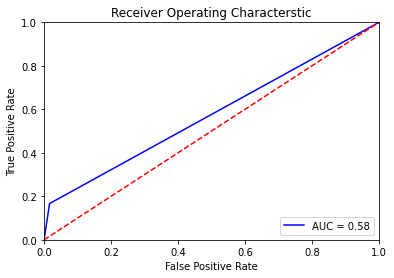

In [68]:
# Plot TPR dan FPR

plt.title('Receiver Operating Characterstic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [69]:
#Tuning Model Decision Tree

parameters = {
    "criterion": ['gini' ,'entropy'],
    "max_depth": range(1, 10),
    "min_samples_split": range(1, 10),
    "min_samples_leaf": range(1, 5)
}

In [70]:
grid = GridSearchCV(decisionTree_model,
                    param_grid = parameters,
                    cv = 10,
                    verbose = 1,
                    n_jobs = -1)

grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 2700 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:  1.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                 

In [71]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [72]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [73]:
grid.best_score_

0.9584976654765173

In [74]:
#Tuned Decision Tree Model

decisionTreeTuned_model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#Train Tuned Decision Tree Tuned Model

decisionTreeTuned_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [75]:
#Test Tuned Decision Tree Model

dtTunedPredict = decisionTreeTuned_model.predict(X_test)

In [76]:
#Akurasi dan Confusion Tuned Matrix Decision Tree Model

dtTunedAccuracy = accuracy_score(y_test, dtTunedPredict)  
dtTunedconfMatrix = confusion_matrix(y_test, dtTunedPredict)
print("Confusion Matrix: ")
print(dtTunedconfMatrix)
print("Decision Tree Accuracy: ", dtTunedAccuracy * 100)

Confusion Matrix: 
[[1344    0]
 [  72    0]]
Decision Tree Accuracy:  94.91525423728814


In [77]:
#Hitung TPR dan FPR

fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, dtTunedPredict)

#Hitung AUC Score

auc_score2 = metrics.roc_auc_score(y_test, dtTunedPredict)

print(auc_score2)

0.5


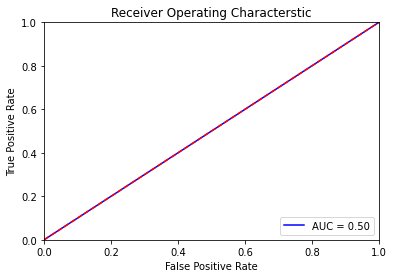

In [78]:
# Plot TPR dan FPR

plt.title('Receiver Operating Characterstic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % auc_score2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [79]:
#Model Kedua: Logistic Regression

logReg_model = linear_model.LogisticRegression(max_iter=1000)

#Train Logistic Regression Model

logReg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
#Test Logistic Regression Model

lrPredict = logReg_model.predict(X_test)

In [81]:
#Akurasi dan Confusion Matrix Logistic Regression Model 

lrAccuracy = accuracy_score(y_test, lrPredict)
lrconfMatrix = confusion_matrix(y_test, lrPredict)
print("Confusion Matrix: ")
print(lrconfMatrix)
print("Logistic Regression Accuracy: ", lrAccuracy * 100)

Confusion Matrix: 
[[1339    5]
 [  63    9]]
Logistic Regression Accuracy:  95.19774011299435


In [82]:
#Hitung TPR dan FPR

fprLr, tprLr, thresholdLr = metrics.roc_curve(y_test, lrPredict)

#Hitung AUC Score

auc_scoreLr = metrics.roc_auc_score(y_test, lrPredict)

print(auc_scoreLr)

0.5606398809523809


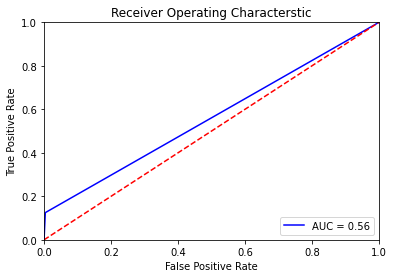

In [83]:
# Plot TPR dan FPR

plt.title('Receiver Operating Characterstic')
plt.plot(fprLr, tprLr, 'b', label = 'AUC = %0.2f' % auc_scoreLr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
#Tuning Logistic Regressions

penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)
hyperparameters = dict(penalty=penalty, C=C, max_iter=[10, 100, 1000])

gridLr = GridSearchCV(logReg_model, hyperparameters, cv=10)
gridLr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [85]:
print('Best Penalty:', gridLr.best_estimator_.get_params()['penalty'])
print('Best C:', gridLr.best_estimator_.get_params()['C'])
print('Best max_iter:', gridLr.best_estimator_.get_params()['max_iter'])
print('Best Estimator:', gridLr.best_estimator_)

Best Penalty: l2
Best C: 0.615848211066026
Best max_iter: 1000
Best Estimator: LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [86]:
#Tuned Logistic Regression Model

logRegTuned_model = linear_model.LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

logRegTuned_model.fit(X_train, y_train)

LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
#Test TunedLogistic Regression Model

logRegTuned_predict = logRegTuned_model.predict(X_test)

In [88]:
lrAccuracy2 = accuracy_score(y_test, logRegTuned_predict)
lrconfMatrix2 = confusion_matrix(y_test, logRegTuned_predict)
print("Confusion Matrix: ")
print(lrconfMatrix2)
print("Logistic Regression Accuracy: ", lrAccuracy2 * 100)

Confusion Matrix: 
[[1340    4]
 [  63    9]]
Logistic Regression Accuracy:  95.2683615819209


In [89]:
#Hitung TPR dan FPR

fprLrTuned, tprLrTuned, thresholdLrTuned = metrics.roc_curve(y_test, logRegTuned_predict)

#Hitung AUC Score

auc_scoreLrTuned = metrics.roc_auc_score(y_test, logRegTuned_predict)

print(auc_scoreLrTuned)

0.5610119047619048


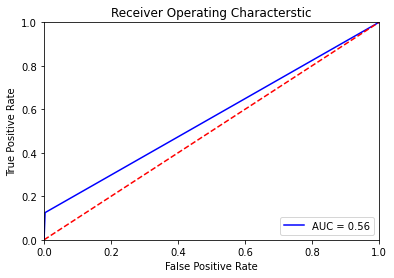

In [90]:
plt.title('Receiver Operating Characterstic')
plt.plot(fprLrTuned, tprLrTuned, 'b', label = 'AUC = %0.2f' % auc_scoreLrTuned)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
#Model Ketiga: K-Neighbors

knn = KNeighborsClassifier(n_neighbors=10)

#Train K-Neighbors Model

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [92]:
#Test K-Neighbors Model

knnPredict = knn.predict(X_test)

In [93]:
#Akurasi dan Confusion Matrix K-Neighbors Model

knnAccuracy = accuracy_score(y_test, knnPredict)  
knnconfMatrix = confusion_matrix(y_test, knnPredict)
print("Confusion Matrix: ")
print(knnconfMatrix)
print("K-Neighbors Accuracy: ", knnAccuracy * 100)

Confusion Matrix: 
[[1344    0]
 [  72    0]]
K-Neighbors Accuracy:  94.91525423728814


In [94]:
#Hitung TPR dan FPR
fprKnn, tprKnn, thresholdKnn = metrics.roc_curve(y_test, knnPredict)

#Hitung AUC Score
auc_scoreKnn = metrics.roc_auc_score(y_test, knnPredict)

print(auc_scoreKnn)

0.5


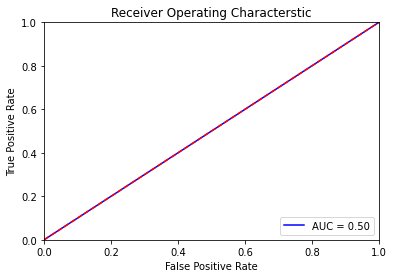

In [95]:
# Plot TPR dan FPR

plt.title('Receiver Operating Characterstic')
plt.plot(fprKnn, tprKnn, 'b', label = 'AUC = %0.2f' % auc_scoreKnn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [96]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,50))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

gridKNN = GridSearchCV(knn, hyperparameters, cv=10)

gridKNN.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [97]:
print('Best leaf_size:', gridKNN.best_estimator_.get_params()['leaf_size'])
print('Best p:', gridKNN.best_estimator_.get_params()['p'])
print('Best n_neighbors:', gridKNN.best_estimator_.get_params()['n_neighbors'])
print('Best Estimator:', gridKNN.best_estimator_)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 9
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')


In [98]:
#Tuned KNN Model

knnTuned_model = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')

knnTuned_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')

In [99]:
# Test Tuned KNN Model

knnTuned_predict = knnTuned_model.predict(X_test)

In [100]:
knnAccuracy2 = accuracy_score(y_test, knnTuned_predict)  
knnconfMatrix2 = confusion_matrix(y_test, knnTuned_predict)
print("Confusion Matrix: ")
print(knnconfMatrix2)
print("K-Neighbors Accuracy: ", knnAccuracy2 * 100)

Confusion Matrix: 
[[1344    0]
 [  72    0]]
K-Neighbors Accuracy:  94.91525423728814


In [101]:
#Hitung TPR dan FPR

fprKnnTuned, tprKnnTuned, thresholdKnnTuned = metrics.roc_curve(y_test, knnTuned_predict)

#Hitung AUC Score

auc_scoreKnnTuned = metrics.roc_auc_score(y_test, knnTuned_predict)

print(auc_scoreKnnTuned)

0.5


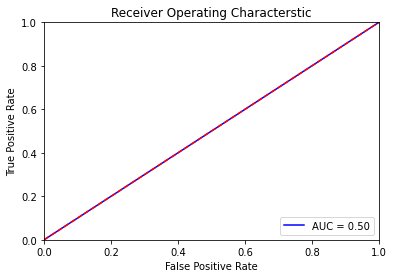

In [102]:
# Plot TPR dan FPR

plt.title('Receiver Operating Characterstic')
plt.plot(fprKnnTuned, tprKnnTuned, 'b', label = 'AUC = %0.2f' % auc_scoreKnnTuned)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()